In [4]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [5]:
from sklearn.tree import DecisionTreeClassifier

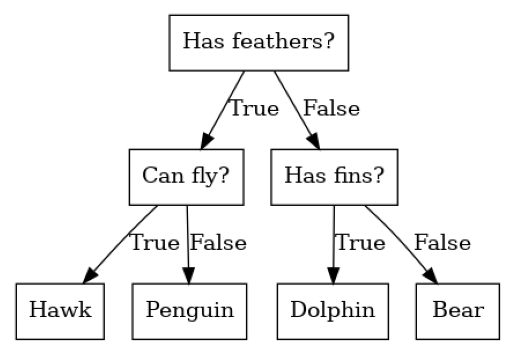

In [6]:
mglearn.plots.plot_animal_tree()

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("training set score: {:.3f}".format(tree.score(X_train,y_train)))
print("test set score: {:.3f}".format(tree.score(X_test,y_test)))

training set score: 1.000
test set score: 0.937


In [8]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0) # max_depth = tree counts
tree.fit(X_train, y_train)
print("training set score: {:.3f}".format(tree.score(X_train,y_train)))
print("test set score: {:.3f}".format(tree.score(X_test,y_test)))

training set score: 0.988
test set score: 0.951


In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(tree, out_file="tree.dot",class_names=["malignity","positivity"],feature_names=cancer.feature_names,impurity=False,filled=True)

In [11]:
import graphviz

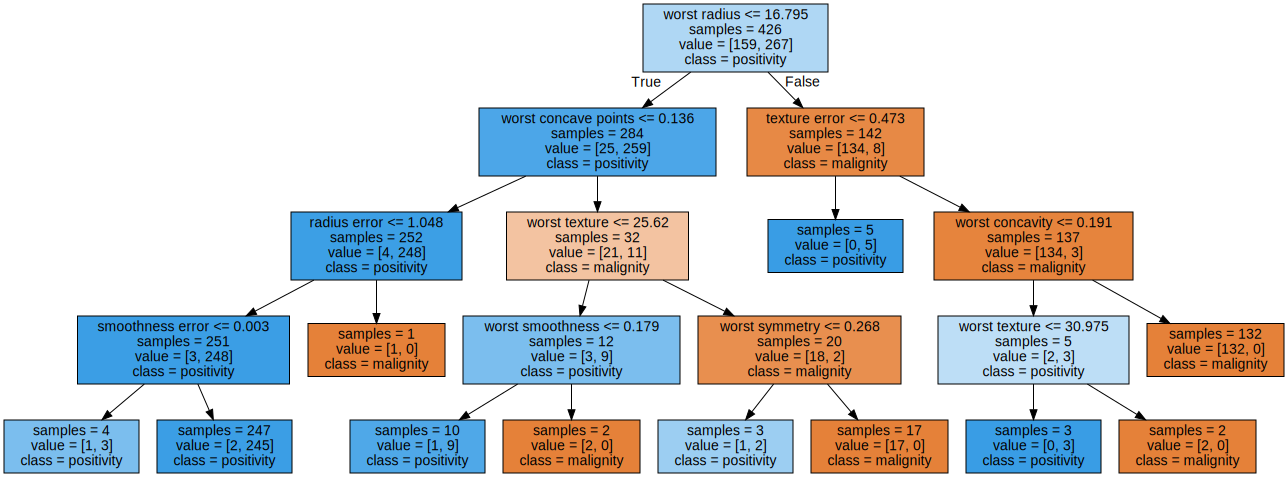

In [12]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

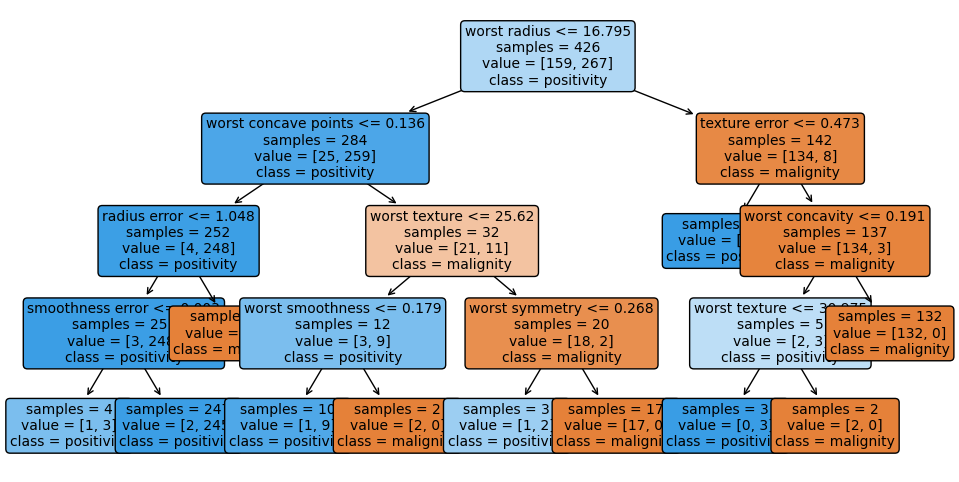

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["malignity","positivity"],feature_names=cancer.feature_names,impurity=False,filled=True,rounded=True,fontsize=10)
plt.show()

In [14]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


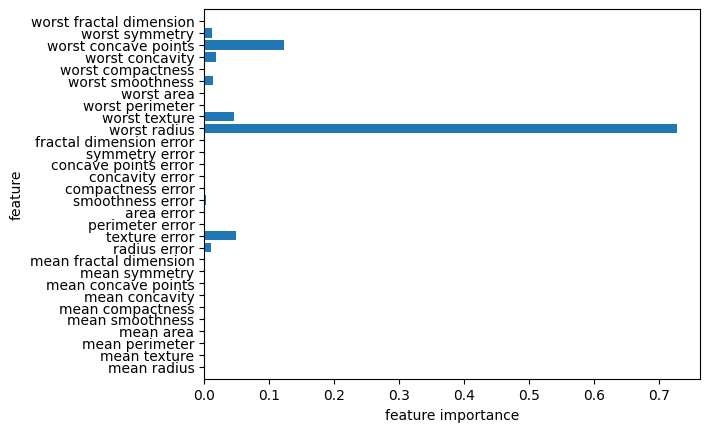

In [15]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


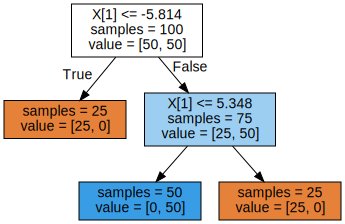

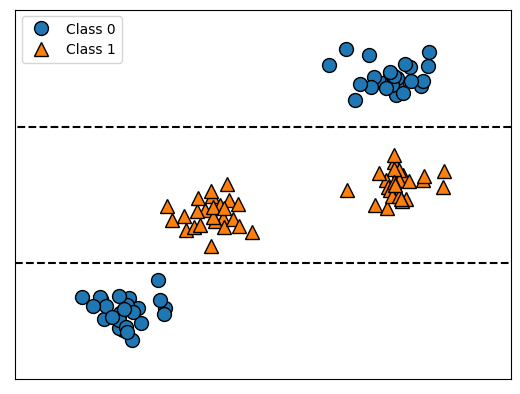

In [16]:
mglearn.plots.plot_tree_not_monotone()

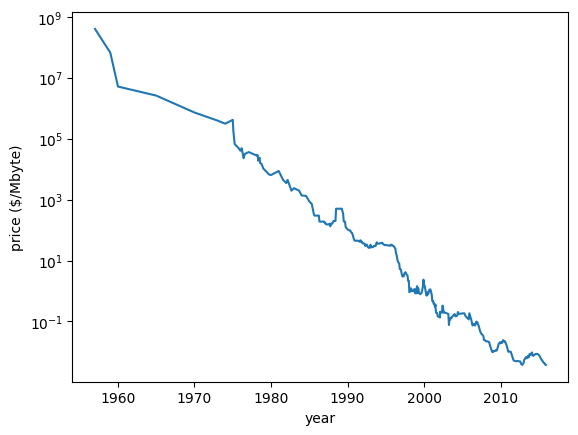

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_trian = data_train.date.to_numpy()[:,np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_trian,y_train)
linear_reg = LinearRegression().fit(X_trian,y_train)

X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


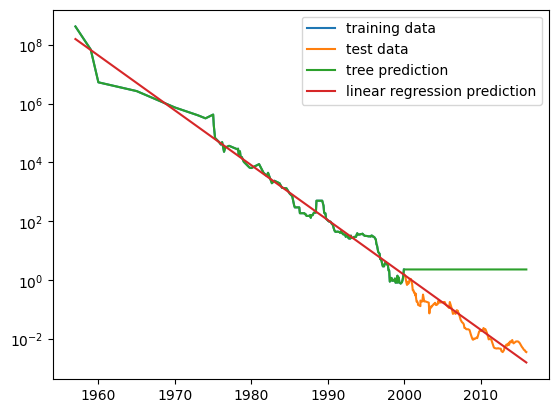

In [23]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear regression prediction")
plt.legend()

In [24]:
tree.fit(data_train[['date']],y_train)
print('특성 개수:',tree.n_features_in_)
print('특성 이름:',tree.feature_names_in_)

특성 개수: 1
특성 이름: ['date']
